In [2]:
import ffit as ff
import matplotlib.pyplot as plt
import numpy as np
import aplot as ap

%load_ext autoreload
%autoreload 2

In [4]:
from scipy._lib._util import getfullargspec_no_self

In [18]:


def get_function_args_ordered(func):
    """
    Returns the names of the arguments and their default values for a given function in the order they are defined.

    :param func: The function to inspect.
    :return: An ordered list of tuples, where each tuple contains the argument name followed by its default value
             or None if the argument has no default value.
    """
    sig = inspect.signature(func)
    args_ordered = [
        (param.name, param.default if param.default is not inspect.Parameter.empty else None)
        for param in sig.parameters.values()
    ]
    return args_ordered

In [53]:
from typing import Any, Dict, List, Optional, Tuple


class DynamicNamedTuple(tuple):
    _order: Dict[str, int]

    def __getattr__(self, name):
        number = self._order[name]
        return self[number]

    def __init__(self, *args, parameters: Optional[List[Tuple[str, Any]]] = None, **kwargs) -> None:
        if parameters is None:
            return
        self._order = {name: i for i, (name, _) in enumerate(parameters)}

    def __new__(cls, *args, **kwargs):
        return super().__new__(cls, *args)


def func(x, amplitude, frequency, phi0=0, offset=0):
    return amplitude * np.cos(2 * np.pi * x * frequency + phi0) + offset


parameters = get_function_args_ordered(func)[1:]

a = DynamicNamedTuple(np.array([1, 2, 3, 4]), parameters=parameters)

CosParam(amplitude=0.10089794524179324, frequency=1.0160215467682459, phi0=0.9643718468968903, offset=1.0006263584929231)

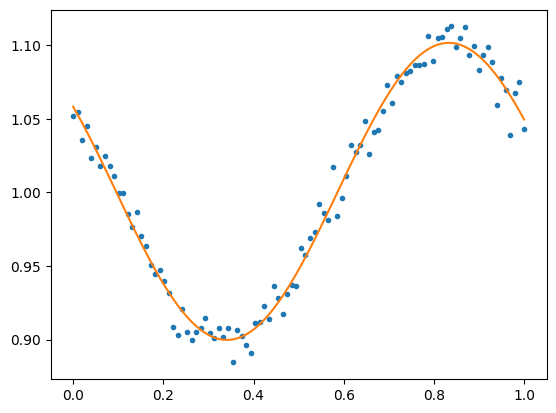

In [11]:
x = np.linspace(0, 100, 10000)
params = (0.1, 1.0, 1.0, 1.0)
freq = params[1]
period = 1 / freq
x = np.linspace(0, period * 1, 100)


y = cos_func(x, *params)
y += np.random.normal(0, 0.1 * params[0], len(y))

ax = ap.ax().plot(x, y, ".")
res = ff.Cos.fit(x, y).plot(ax).res
# guess = ff.Cos.guess(x, y).plot(ax).res
# y2 = cos_func(x, *res)
# ax.plot(x, y2)
res

In [4]:
%matplotlib widget

In [14]:
v1 = 0.1
v2 = 0.09091619546022754
(v1 - v2) / v1 / 1.2 / 10

0.007569837116477053

In [ ]:
x = [1,2,3,4,5]
y = [0,5,4,2,3]

1.0

24.999999999999982 0.008000000000000005


(LorentzianParam(amplitude=0.0009999955166990445, gamma=0.9999977388383855, x0=0.9999999999997834, offset=1.000000004483344),
 <function ffit.fit_logic.FitLogic.fit.<locals>.<lambda>(x)>)

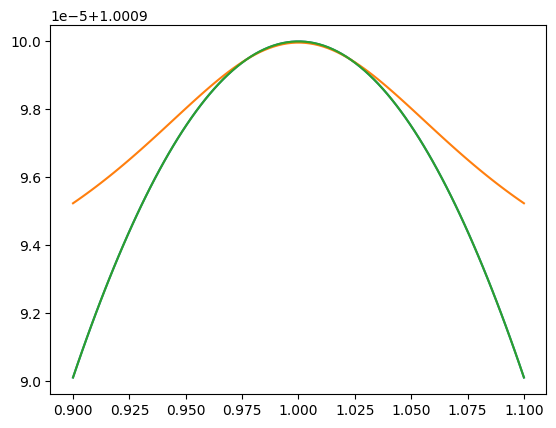

In [63]:
param = (0.001, 1.0, 1.0, 1.0)
t = 0.1
lims = (param[2] - param[1] * t), (param[2] + param[1] * t)
x = np.linspace(*lims, int(max((lims[1] - lims[0]) / param[1], 100)))

r = max(1 / ((lims[1] - lims[0]) / param[1]) ** 2, 1)
# r = (1 / (1 - min((lims[1] - lims[0]) / param[1], 0.1))) ** 2
print(r, 0.2 / r)

y = ff.Lorentzian.func(x, *param)  # + np.random.normal(0, 0.5, len(x))
ax = ap.ax().plot(x, y)
ff.Lorentzian.guess(x, y).plot()
ff.Lorentzian.fit(x, y).plot()

(HyperbolaParam(semix=99.99997008159676, semiy=0.0009999994064877264, x0=0.9999999992564108, y0=1.0000000005935026),
 <function ffit.fit_logic.FitLogic.fit.<locals>.<lambda>(x)>)

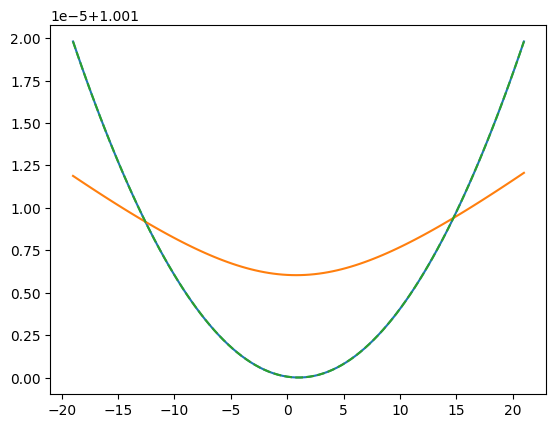

In [81]:
param = (100.0, 0.001, 1.0, 1.0)
t = 0.2
lims = (param[2] - param[0] * t), (param[2] + param[0] * t)
x = np.linspace(*lims, 100)

y = ff.Hyperbola.func(x, *param)  # + np.random.normal(0, 0.5, len(x))
ax = ap.ax().plot(x, y)
ff.Hyperbola.guess(x, y).plot()
ff.Hyperbola.fit(x, y).plot(linestyle="--")

(ExpParam(amplitude=1.8769568747081709, rate=1.030599904864354, offset=1.1419569409098982),
 <function ffit.fit_logic.FitLogic.fit.<locals>.<lambda>(x)>)

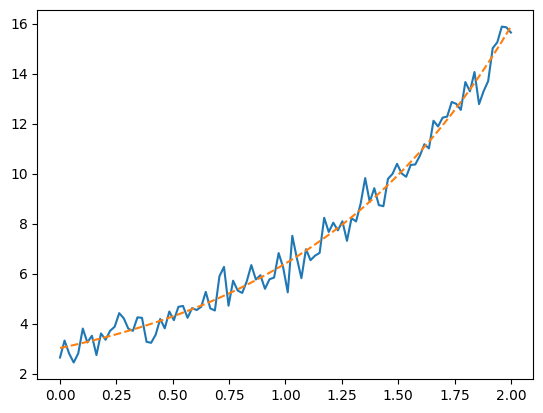

In [126]:
param = (2, 1.0, 1.0)
x = np.linspace(0, 2, 100)

y = ff.Exp.func(x, *param) + np.random.normal(0, 0.5, len(x))

average_size = max(len(y) // 10, 1)

data = np.array([x, y]).T
sorted_data = data[data[:, 1].argsort()]


ax = ap.ax().plot(x, y)
# print(ff.Exp.guess(x, y).plot().res)


ff.Exp.fit(x, y).plot(linestyle="--")
# ap.ax(212).plot(sorted_data[:, 0], sorted_data[:, 1])
# offset

In [19]:
np.log(1) 

0.0

In [ ]:
amplitude * np.log(rate * 1) + offset

In [3]:
ff.Log.func(1, *param)

102.10340371976184

In [ ]:
1

/Users/4cd87a/Documents/Projects/PhD/codes/ffit/ffit/funcs/func_log.py:22: RuntimeWarning: invalid value encountered in log
  def log_guess(x: _NDARRAY, y: _NDARRAY, **kwargs):


(LogParam(amplitude=1.9999999999999996, rate=349444.64183780603, offset=1.0000000000000009),
 <function ffit.fit_logic.FitLogic.fit.<locals>.<lambda>(x)>)

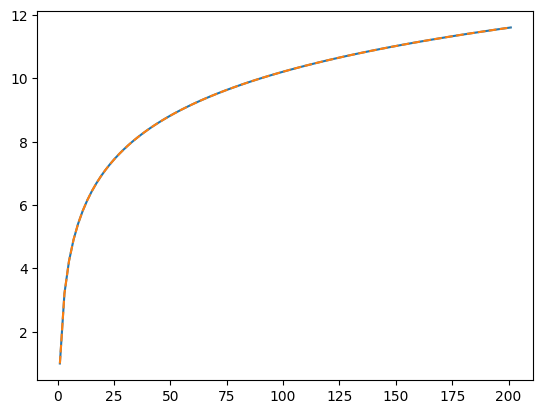

In [49]:
param = (2.0, 0.1, 1.0)
x = np.linspace(1, 201, 100)

y = ff.Log.func(x, *param)  # + np.random.normal(0, 5, len(x))
# y = param[0] * np.log(1e-10 * x) + param[2]


ax = ap.ax().plot(x, y)
# print(ff.Log.guess(x, y).plot().res)


ff.Log.fit(x, y).plot(linestyle="--")
# ap.ax(212).plot(sorted_data[:, 0], sorted_data[:, 1])
# offset

In [ ]:
1